## Mongobch results

### Deployment
Mongodb - Free cluster tier on MongoDB Atlas: M0 (Shared RAM, 512 MB Storage, 3 nodes, AWS, Frankfurt eu-central-1)

mongobch.py run on t2.nano AWS, Frankfurt (eu-central-1)


In [8]:
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep = TRUE)
  require(p, character.only = TRUE, quietly = TRUE)
}

usePackage("data.table") 
usePackage("ggplot2")

Sys.setlocale("LC_TIME", "us")

options(stringsAsFactors = FALSE)

[1] "English_United States.1252"

In [9]:
raw <- fread('grep Thread ..\\logs\\aws_atlas_bench*', 
             sep=",", 
             col.names=c("time", "response_time", "case", "thread", "label"))


tidy <- data.table(raw, do.call(rbind, strsplit(raw$label,"-")))

setnames(tidy, "V1", "deployment")
setnames(tidy, "V2", "posts_num")
setnames(tidy, "V3", "thread_num")


tidy$thread_num <- as.numeric(tidy$thread_num)
tidy$posts_num <- as.numeric(tidy$posts_num)

tidy$time <- as.POSIXct(sapply(strsplit(tidy$time, ":"), function(x){ paste(x[2:4], collapse=":")}), tz="", format="%Y-%m-%d %H:%M:%OS")

head(tidy)
tail(tidy)

time,response_time,case,thread,label,deployment,posts_num,thread_num
2018-05-25 11:49:28,0.000000,started,Thread-0,aws-400000-5,aws,4e+05,5
2018-05-25 11:49:28,0.000000,started,Thread-1,aws-400000-5,aws,4e+05,5
2018-05-25 11:49:28,0.000000,started,Thread-2,aws-400000-5,aws,4e+05,5
2018-05-25 11:49:28,0.000000,started,Thread-3,aws-400000-5,aws,4e+05,5
2018-05-25 11:49:28,0.000000,started,Thread-4,aws-400000-5,aws,4e+05,5
2018-05-25 11:49:28,3.587999,upvote,Thread-0,aws-400000-5,aws,4e+05,5


time,response_time,case,thread,label,deployment,posts_num,thread_num
2018-05-25 15:14:34,245.5652871,finished,Thread-12,aws-300000-40,aws,3e+05,40
2018-05-25 15:14:32,2.6494048,read,Thread-31,aws-300000-40,aws,3e+05,40
2018-05-25 15:14:34,245.5682278,finished,Thread-31,aws-300000-40,aws,3e+05,40
2018-05-25 15:14:33,2.6492047,read,Thread-6,aws-300000-40,aws,3e+05,40
2018-05-25 15:14:36,0.5893083,upvote,Thread-6,aws-300000-40,aws,3e+05,40
2018-05-25 15:14:36,247.6287382,finished,Thread-6,aws-300000-40,aws,3e+05,40


Saving 6.67 x 6.67 in image


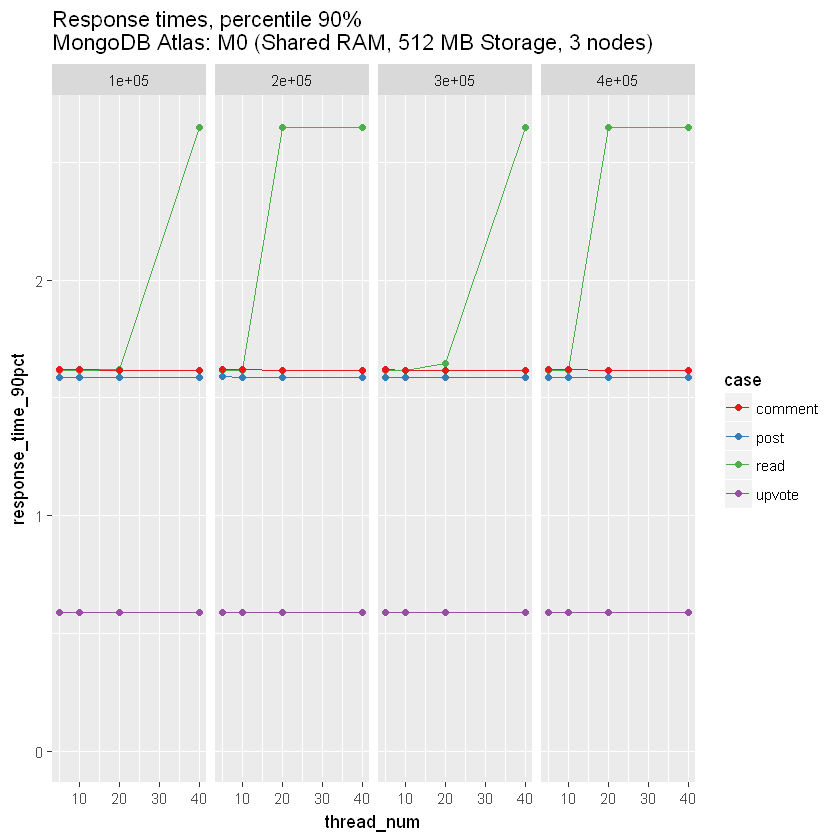

In [10]:
  ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), 
                                                            by="case,thread_num,posts_num"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=case, 
             colour=case)) + ylim(0,NA) +  
    scale_color_brewer(palette="Set1") + facet_grid( . ~ posts_num ) +
    geom_line() + geom_point() + ggtitle(paste0("Response times, percentile 90%\nMongoDB Atlas: M0 (Shared RAM, 512 MB Storage, 3 nodes) ")) 

ggsave("resp_time_vs_size_aws.png")

Saving 6.67 x 6.67 in image


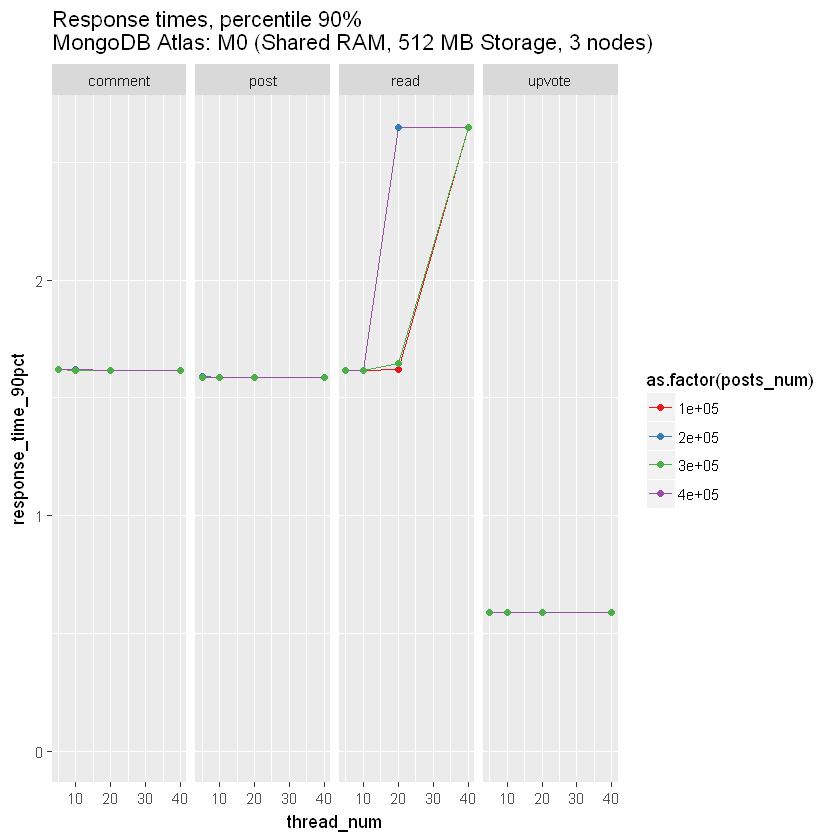

In [11]:
ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), 
                                                           by="case,thread_num,posts_num,deployment"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=as.factor(posts_num), 
             colour=as.factor(posts_num))) + ylim(0,NA) + 
    scale_color_brewer(palette="Set1") + facet_grid( . ~ case ) + 
    geom_line() + geom_point()+ ggtitle(paste0("Response times, percentile 90%\nMongoDB Atlas: M0 (Shared RAM, 512 MB Storage, 3 nodes) ")) 

ggsave("resp_time_aws.png")

### Duting 100K test replication was about 10 minutes late

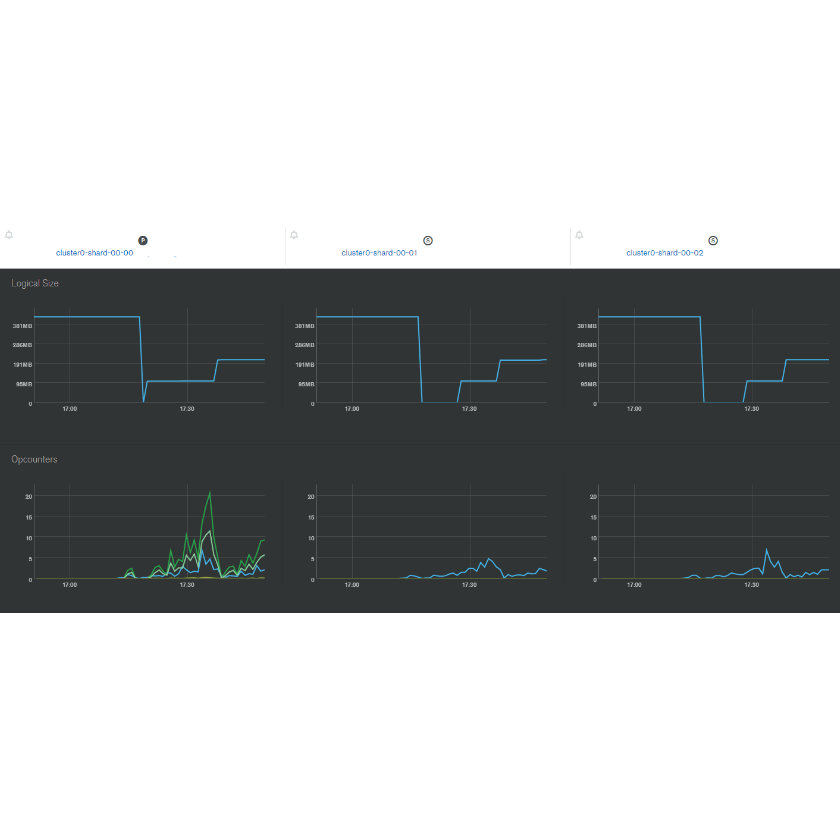

In [12]:
usePackage("png")
img <- readPNG("cluster_monitoring.png")
grid::grid.raster(img)